In [6]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations/'

In [7]:
# %%bash

! mkdir $folder/barplots
!mkdir $folder/tidy
!mkdir $folder/size
!mkdir $folder/psi
# mkdir $folder/modalities_sizes

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations//barplots': File exists
mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations//tidy': File exists
mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations//size': File exists
mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations//psi': File exists


In [26]:
import glob
import os

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks', context='paper')


In [27]:

dfs = []

for csv in sorted(glob.glob('{}/size/*.csv'.format(folder))):
    df = pd.read_csv(csv, header=None, names=['phenotype', 'modality', 'size'])
    df['iteration'] = int(os.path.basename(csv).split('.')[0].split('_')[1])
    dfs.append(df)
    
sizes = pd.concat(dfs, ignore_index=True)
# sizes.columns = 

In [29]:
sizes['modality'] = sizes['modality'].replace({'~1': 'included', '~0': 'excluded', 
                                               'multimodal': 'ambivalent'})

In [30]:
sizes.tail()

,phenotype,modality,size,iteration
7172,MN,included,136,999
7173,NPC,bimodal,4932,999
7174,NPC,included,8,999
7175,iPSC,bimodal,7629,999
7176,iPSC,included,4,999


In [34]:
import anchor

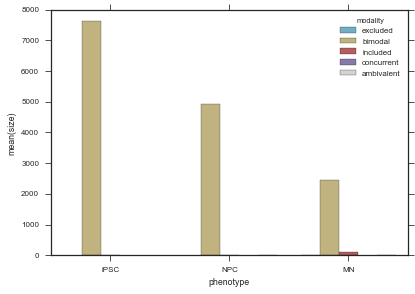

In [35]:
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE)

In [36]:
sizes.groupby(['phenotype', 'modality'])['size'].mean()

phenotype  modality  
MN         ambivalent      16.501502
           bimodal       2460.345345
           excluded         1.104265
           included       118.906907
NPC        ambivalent       1.000000
           bimodal       4929.364364
           included        10.645291
iPSC       bimodal       7629.528529
           included         3.567901
Name: size, dtype: float64

In [37]:
sns.set(style='ticks', context='paper')

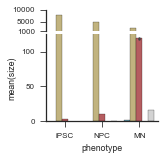

In [38]:
fig, axes = plt.subplots(figsize=(2, 2), nrows=2, gridspec_kw=dict(hspace=0.05, height_ratios=[0.2, 0.8]))
ax = axes[0]
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.locator_params(nbins=3, axis='y')
ymin, ymax = ax.get_ylim()
# ax.set_ylim()
ax.set(xticks=[], xlabel='', ylim=(1000, ymax), ylabel='', yticks=[1000, 5000, 10000])
sns.despine(ax=ax, bottom=True)
ax.legend_.remove()

ax = axes[1]
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.set_ylim(0, 125)
ax.locator_params(nbins=4, axis='y')
ax.legend_.remove()
sns.despine(ax=ax)
# fig.tight_layout()
# fig.s
fig.savefig('{}/permuted_modality_barplot_counts.pdf'.format(folder))

In [39]:
percentages = sizes.copy()
percentages['percentage'] = percentages.groupby(['phenotype', 'iteration'])['size'].apply(lambda x: 100*x/x.sum())
percentages.head()

,phenotype,modality,size,iteration,percentage
0,MN,bimodal,2440,1,94.026975
1,MN,ambivalent,20,1,0.770713
2,MN,excluded,1,1,0.038536
3,MN,included,134,1,5.163776
4,NPC,bimodal,4933,1,99.858300


In [40]:
percentages.groupby(['phenotype', 'modality'])['percentage'].mean()

phenotype  modality  
MN         ambivalent     0.635654
           bimodal       94.774950
           excluded       0.042537
           included       4.580412
NPC        ambivalent     0.020243
           bimodal       99.784704
           included       0.215492
iPSC       bimodal       99.954520
           included       0.046743
Name: percentage, dtype: float64

In [41]:
sns.set(style='ticks', context='paper')

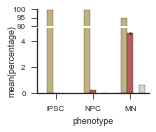

In [43]:
fig, axes = plt.subplots(figsize=(2, 1.5), nrows=2, gridspec_kw=dict(hspace=0.05, 
                                                                     height_ratios=[0.2, 0.8]))
ax = axes[0]
sns.barplot(x='phenotype', y='percentage', hue='modality', data=percentages, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.locator_params(nbins=3, axis='y')
ax.set(xticks=[], xlabel='', ylim=(90, 100), ylabel='')#, yticks=[50, 75, 100])
sns.despine(ax=ax, bottom=True)
ax.legend_.remove()

ax = axes[1]
sns.barplot(x='phenotype', y='percentage', hue='modality', data=percentages, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.set_ylim(0, 5)
ax.locator_params(nbins=3, axis='y')
ax.legend_.remove()
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/permuted_modality_barplot_percentage.pdf'.format(folder))